In [46]:
from pygam import LogisticGAM, s, f, l
from datasets import load_titanic
from tools import *
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, plot_roc_curve

In [18]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [19]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [20]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [21]:
scaler = StandardScaler().fit(train_X)
original_X = scaler.transform(original_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

original_X = pd.DataFrame(original_X, columns=features)
train_X = pd.DataFrame(train_X, columns=features)
test_X = pd.DataFrame(test_X, columns=features)

In [22]:
len(train_X.columns)

10

## Spline terms

In [23]:
selected_features = ['pclass', 'age', 'sibsp', 'sex_male', 'embarked_S']

In [51]:
model = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4))
model._estimator_type = "classifier"
model.classes_ = np.array([False, True])
# model.fit(train_X, train_y)
model.gridsearch(train_X[selected_features].values, train_y.values)
model.score = model.accuracy

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


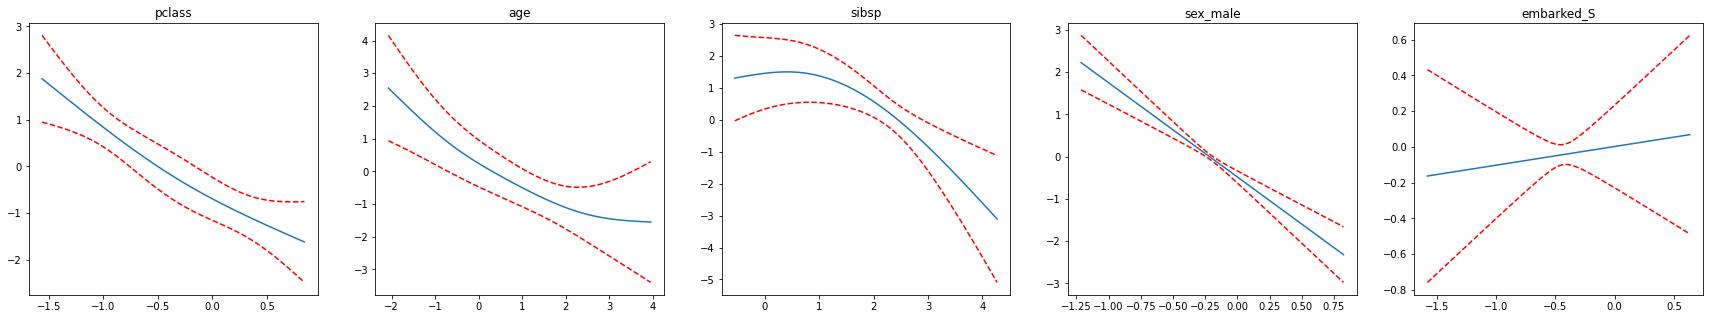

In [54]:
fig, axs = plt.subplots(1, len(train_X[selected_features].columns), figsize=(30,5))
titles = train_X[selected_features].columns

for i, ax in enumerate(axs):
    XX = model.generate_X_grid(term=i)
    pdep, confi = model.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])

In [59]:
model_performance(model, train_X[selected_features], train_y, test_X[selected_features], test_y)

Train score
0.8707865168539326
Test score
0.7769985974754559


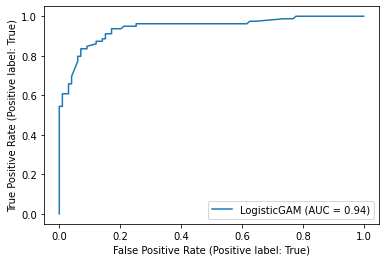

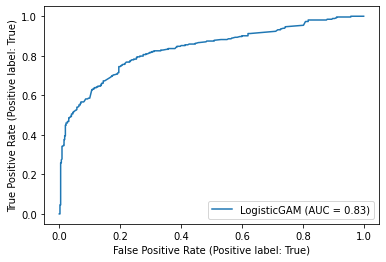

In [55]:
plot_roc_curve(model, train_X[selected_features], train_y)
plot_roc_curve(model, test_X[selected_features], test_y)

In [56]:
confusion_matrix(model.predict(train_X[selected_features]), train_y, model.predict(test_X[selected_features]), test_y)

Train
TN: 86, TP: 69, FN: 10, FP: 13
Test
TN: 369, TP: 185, FN: 78, FP: 81
